# Get which country a polygon belongs to

In [1]:
%pip install shapely
%pip install geojson

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from shapely import wkt  
from shapely.geometry import shape
import matplotlib.pyplot as plt
import pandas as pd
import geojson

In [3]:
geojson_file = 'dataset/countries.geojson'
sample_file = 'dataset/sample.csv'

In [4]:
with open(geojson_file) as f:
    gj = geojson.load(f)

In [5]:
country_polys = {}
for feature in gj['features']:
    country = feature['properties']['ADMIN']
    geometry = feature['geometry']
    country_polys[country] = shape(geometry)

## Next can be skipped, it plots the world map

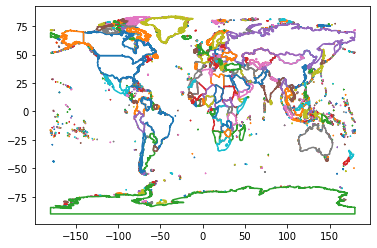

In [6]:
import matplotlib.pyplot as plt

for count in country_polys:
    if country_polys[count].type == 'MultiPolygon':
        for polys in country_polys[count].geoms:
            x,y = polys.exterior.xy
            plt.plot(x,y)
    else:
        x,y = country_polys[count].exterior.xy
        plt.plot(x,y)


In [7]:
def get_country(polygon):
    for count in country_polys:
        if polygon1.within(country_polys[count]):
            return count
    return 'NA'

In [9]:
df = pd.read_csv(sample_file)

In [10]:
for row in df['tile']:
    polygon1 = wkt.loads(row)
    print(get_country(polygon1))


Netherlands
Puerto Rico
Indonesia
Finland
Russia
Germany
Russia
France
Canada
Hungary
Croatia
Puerto Rico
Russia
United States of America
Argentina
Thailand
Slovenia
United States of America
United Kingdom
United States of America
United States of America
Italy
United States of America
United States of America
United States of America
United States of America
Ireland
France
South Africa
Myanmar
Saudi Arabia
Cambodia
Azerbaijan
China
Germany
Philippines
United States of America
Brazil
Romania
Kyrgyzstan
Indonesia
Italy
United States of America
Kyrgyzstan
United States of America
India
Spain
China
Vietnam
NA
Vietnam
Mexico
Indonesia
Vietnam
Republic of Serbia
India
Turkey
Canada
China
Indonesia
Thailand
United States of America
India
Turkey
Oman
NA
Indonesia
Indonesia
United States of America
Austria
India
NA
Greece
India
Russia
India
Thailand
Laos
Italy
India
United States of America
Bosnia and Herzegovina
India
China
United States of America
Italy
Russia
United States of America
Brazil